# House Prices

##   Sudip Baral  <br>  Nam Pham           

In [42]:
# import needed library
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Draw inline
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

## Data Exploration

In [43]:
# Read the data into DataFrams
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
                        

In [44]:
# checking the training test
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
# checking the size of training dataset
train_df.shape


(1460, 81)

In [46]:
# checking the testing dataset
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
# checking the size of  testing dataset
test_df.shape

(1459, 80)

## Missing Data

In [48]:
# Compute the NaN percentage of each feature
users_nan = (train_df.isnull().sum() / train_df.shape[0]) * 100
tests_nan = (test_df.isnull().sum() / test_df.shape[0]) * 100

In [49]:
# The percentage of missing data in each colum in training data
users_nan.sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [50]:
# The percentage of missing data in each colum in testing data
tests_nan.sort_values(ascending=False)

PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
FireplaceQu      50.034270
LotFrontage      15.558602
GarageCond        5.346127
GarageQual        5.346127
GarageYrBlt       5.346127
GarageFinish      5.346127
GarageType        5.209047
BsmtCond          3.084304
BsmtQual          3.015764
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
MasVnrType        1.096642
MasVnrArea        1.028101
MSZoning          0.274160
BsmtHalfBath      0.137080
Utilities         0.137080
Functional        0.137080
BsmtFullBath      0.137080
BsmtFinSF2        0.068540
BsmtFinSF1        0.068540
Exterior2nd       0.068540
BsmtUnfSF         0.068540
TotalBsmtSF       0.068540
SaleType          0.068540
Exterior1st       0.068540
                   ...    
OverallQual       0.000000
SaleCondition     0.000000
Heating           0.000000
ExterQual         0.000000
TotRmsAbvGrd      0.000000
YrSold            0.000000
M

### in both training and testing data set the feature PoolQC, MiscFeature , Alley, Fence   has a high rate of missing data, so to maximine our performing of our classifiers we will build we better not include these feature at the modeling part

## Visualizing the Data


In [51]:
# Merge train and test users
df = pd.concat((train_df, test_df), axis=0,
                  ignore_index=True)
df.shape

(2919, 81)

In [52]:
# Print the first 5 rows
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### Bedroom

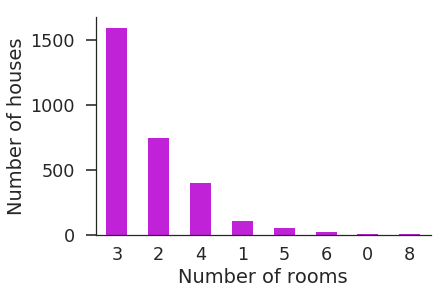

In [53]:
df.BedroomAbvGr.value_counts(dropna=False).plot(kind='bar', color='#c022d8', rot=0)
plt.xlabel('Number of rooms')
plt.ylabel('Number of houses')
sns.despine()

### Price

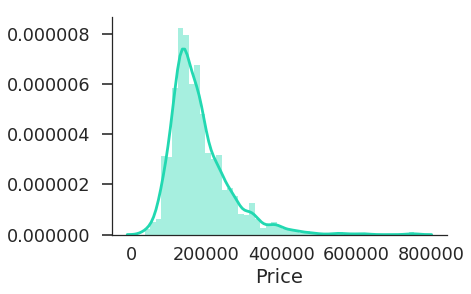

In [54]:
#histogram
sns.distplot(train_df.SalePrice.dropna(), color='#22d8b1')
plt.xlabel('Price')
sns.despine()



In [55]:
print("Some Statistics of the Housing Price:\n")
print(train_df['SalePrice'].describe())
print("\nThe median of the Housing Price is: ", train_df['SalePrice'].median(axis = 0))

Some Statistics of the Housing Price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is:  163000.0


### Relationship with numerical variables

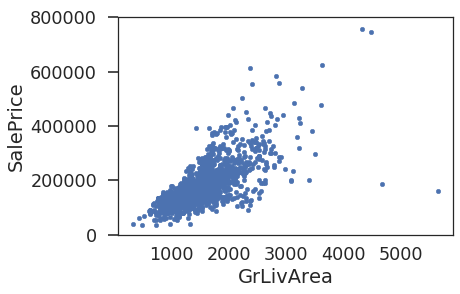

In [56]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

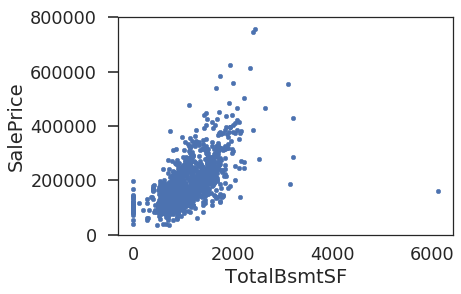

In [57]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Relationship with categorical features

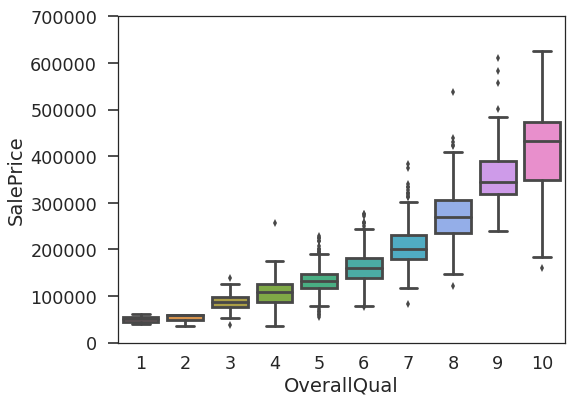

In [58]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=700000);

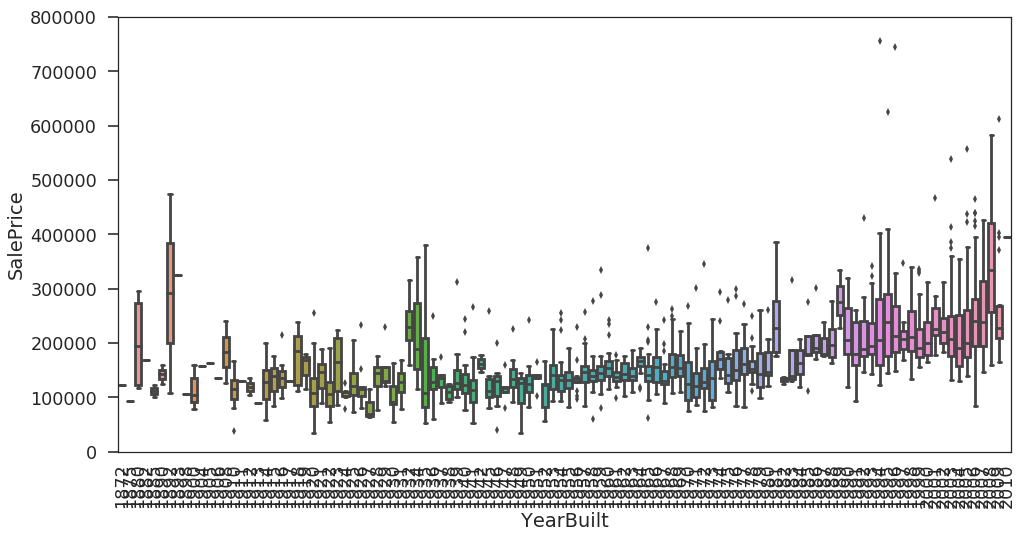

In [59]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### 'SalePrice' correlation matrix

In [60]:
#saleprice correlation matrix
from pandas import *
import seaborn as sns
#correlation matrix
corrmat = train_df.corr()

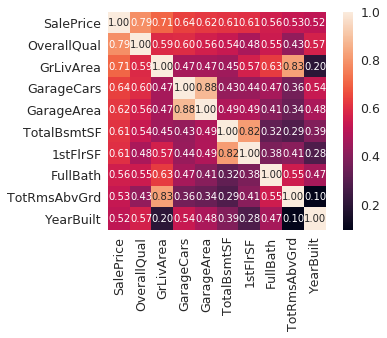

In [61]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modeling

In [62]:
# Convert Catergorical features to category data type
categorical_features = [
    'MSZoning','LotShape','LandContour','Utilities','LotConfig',
    'LandSlope','Neighborhood','Condition1','Condition2',
    'BldgType','HouseStyle','RoofMatl','Exterior1st','Exterior2nd',
    'MasVnrType', 'ExterQual','ExterCond','Foundation','BsmtQual',
    'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
    'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
    'GarageCond','PavedDrive', 'SaleType','SaleCondition'
]

for categorical_feature in categorical_features:
    df[categorical_feature] = df[categorical_feature].astype('category')


In [63]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [64]:
# Remove high rate missing feature column
for col in ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu']:
    df.drop(col, axis=1, inplace = True)


In [65]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


#### for "NaN", find the value that is most common in the column it is found and replace the "NaN" with it

In [66]:
categorical_features = [
    'MSZoning','LotShape','LandContour','Utilities','LotConfig',
    'LandSlope','Neighborhood','Condition1','Condition2',
    'BldgType','HouseStyle','RoofMatl','Exterior1st','Exterior2nd',
    'MasVnrType', 'ExterQual','ExterCond','Foundation','BsmtQual',
    'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
    'Functional','GarageType','GarageFinish','GarageQual',
    'GarageCond','PavedDrive', 'SaleType','SaleCondition',
    'Street','RoofStyle'
]
fcc_list = len(categorical_features)
from collections import Counter
print("The most common in the column")
for i in range(fcc_list):
    lst = df[categorical_features[i]]
    data = Counter(lst)
    most_common = max(lst, key=data.get)  
    print(categorical_features[i],":",most_common) 
    df[categorical_features[i]].replace("NA", most_common, inplace=True)


The most common in the column
MSZoning : RL
LotShape : Reg
LandContour : Lvl
Utilities : AllPub
LotConfig : Inside
LandSlope : Gtl
Neighborhood : NAmes
Condition1 : Norm
Condition2 : Norm
BldgType : 1Fam
HouseStyle : 1Story
RoofMatl : CompShg
Exterior1st : VinylSd
Exterior2nd : VinylSd
MasVnrType : None
ExterQual : TA
ExterCond : TA
Foundation : PConc
BsmtQual : TA
BsmtCond : TA
BsmtExposure : No
BsmtFinType1 : Unf
BsmtFinType2 : Unf
Heating : GasA
HeatingQC : Ex
CentralAir : Y
Electrical : SBrkr
KitchenQual : TA
Functional : Typ
GarageType : Attchd
GarageFinish : Unf
GarageQual : TA
GarageCond : TA
PavedDrive : Y
SaleType : WD
SaleCondition : Normal
Street : Pave
RoofStyle : Gable


In [67]:
# Replace NaN in LotFrontage and GarageYrBlt  by the average of its column
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace =True)
df.GarageYrBlt.fillna(df.GarageYrBlt.mean(), inplace =True)

In [68]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [69]:
# Replace NaN in columns  by the average of its column
df.MasVnrArea.fillna(df.MasVnrArea.mean(), inplace =True)
df.BsmtFullBath.fillna(df.BsmtFullBath.mean(), inplace =True)
df.BsmtHalfBath.fillna(df.BsmtHalfBath.mean(), inplace =True)
df.BsmtFinSF1.fillna(df.BsmtFinSF1.mean(), inplace =True)
df.BsmtFinSF2.fillna(df.BsmtFinSF2.mean(), inplace =True)
df.BsmtUnfSF.fillna(df.BsmtUnfSF.mean(), inplace =True)
df.GarageArea.fillna(df.GarageArea.mean(), inplace =True)
df.GarageCars.fillna(df.GarageCars.mean(), inplace =True)
df.TotalBsmtSF.fillna(df.TotalBsmtSF.mean(), inplace =True)

In [70]:
# Checking NaN value after initial process
df_nan = (df.isnull().sum() / df.shape[0]) * 100
# The percentage of missing data in each colum in testing data
df_nan.sort_values(ascending=False)

SalePrice        49.982871
GarageQual        5.447071
GarageFinish      5.447071
GarageCond        5.447071
GarageType        5.378554
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrType        0.822199
MSZoning          0.137033
Functional        0.068517
Utilities         0.068517
SaleType          0.034258
KitchenQual       0.034258
Exterior2nd       0.034258
Exterior1st       0.034258
Electrical        0.034258
GarageArea        0.000000
ExterCond         0.000000
GarageCars        0.000000
FullBath          0.000000
Foundation        0.000000
Fireplaces        0.000000
ExterQual         0.000000
YrSold            0.000000
EnclosedPorch     0.000000
Condition2        0.000000
GarageYrBlt       0.000000
                   ...    
OverallQual       0.000000
PavedDrive        0.000000
PoolArea          0.000000
RoofMatl          0.000000
SaleCondition     0.000000
HalfBath          0.000000
S

In [71]:
#One-hot-encoding features
for f in categorical_features:
    df_dummy = pd.get_dummies(df[f], prefix=f)
    df = df.drop([f], axis=1)
    df = pd.concat((df, df_dummy), axis=1)

In [72]:
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
np.random.seed(0)
# Splitting train and test
# Create label and id_test vector
labels = train_df['SalePrice']
id_test = test_df['Id']
end_train = train_df.shape[0]
vals = df.values
X = vals[:end_train]   

In [73]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleCondition_Normal,SaleCondition_Partial,Street_Grvl,Street_Pave,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,1,0,0,1,0,1,0,0,0,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,1,0,0,1,0,1,0,0,0,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,1,0,0,1,0,1,0,0,0,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,1,0,1,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,1,0,0,1,0,1,0,0,0,0


In [74]:
# Divide the training data into a training and test set
from sklearn.model_selection import train_test_split
# y = users['country_destination']
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33)

## Predict

## Using Linear Regression to predict

In [80]:

# The following line will imort LinearRegression "Class"
from sklearn.linear_model import LinearRegression
my_linreg = LinearRegression()
my_linreg.fit(X_train, y_train)
# make preditions on the testing set
y_prediction = my_linreg.predict(X_test)
# print(y_prediction)

In [79]:
#Checking the result
results = pd.DataFrame()
results['actual'] = y_test 
results['prediction'] = y_prediction 
print(results)

      actual  prediction
529   200624    200624.0
491   133000    133000.0
459   110000    110000.0
279   192000    192000.0
655    88000     88000.0
1013   85000     85000.0
1403  282922    282922.0
601   141000    141000.0
1182  745000    745000.0
687   148800    148800.0
1317  208900    208900.0
1003  136905    136905.0
1300  225000    225000.0
1392  123000    123000.0
1014  119200    119200.0
254   145000    145000.0
1322  190000    190000.0
89    123600    123600.0
31    149350    149350.0
482   155000    155000.0
142   166000    166000.0
811   144500    144500.0
52    110000    110000.0
857   174000    174000.0
1159  185000    185000.0
991   168000    168000.0
1358  177500    177500.0
649    84500     84500.0
724   320000    320000.0
575   118500    118500.0
...      ...         ...
1227  147000    147000.0
530   175000    175000.0
1399  137450    137450.0
922   169990    169990.0
912    88000     88000.0
418   126000    126000.0
906   255000    255000.0
751   162000    162000.0


### Evaluation for Regression using RMSE

In [37]:
from sklearn import metrics
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)
# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error"
rmse = np.sqrt(mse)
print("Root Mean Square Error:",rmse)
print("The accuracy score of Linear Regression:", 1 - rmse*rmse)

Root Mean Square Error: 1.69585269284e-08
The accuracy score of Linear Regression: 1.0


### Using Random Forest Classifier to predict

In [108]:

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)

y_training = my_RandomForest.predict(X_train)
acc_train = accuracy_score(y_train, y_training)

y_predict = my_RandomForest.predict(X_test)
acc_test = accuracy_score(y_test, y_predict)

print("Accuracy on training data:", acc_train)
print("Accuracy on test data:", acc_test)

Accuracy on training data: 1.0
Accuracy on test data: 0.0248962655602


### Using Gaussian Naive Bayes to predict

In [109]:
 gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc_train = gnb.score(X_train, y_train)
acc_test = gnb.score(X_test, y_test)

print("Accuracy on training data:", acc_train)
print("Accuracy on test data:", acc_test)

Accuracy on training data: 1.0
Accuracy on test data: 0.510373443983


### Using Decition Tree Classfier to predict

In [110]:
# we can simply use decision tree to clarify our prediction
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
# fitting the model
decisiontree.fit(X_train, y_train)
# predict the response
y_predict = decisiontree.predict(X_test) 
y_training = decisiontree.predict(X_train)

acc_train= accuracy_score(y_train, y_training)
acc_test= accuracy_score(y_test, y_predict)

print("Accuracy on training data:", acc_train)
print("Accuracy on test data:", acc_test)

Accuracy on training data: 1.0
Accuracy on test data: 0.419087136929


## Using Gradient Boosting Algorithms

### Using XGBoost

In [72]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
#Make predictions for test data
y_predict = model.predict(X_test)
y_training = model.predict(X_train)

acc_train= accuracy_score(y_train, y_training)
acc_test= accuracy_score(y_test, y_predict)

print("Accuracy on training data:", acc_train)
print("Accuracy on test data:", acc_test)

Accuracy on training data: 0.907975460123
Accuracy on test data: 0.381742738589
